In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import arange
import math

import seaborn as sns
sns.set_style("white")

import scipy as sp
from scipy import linalg, optimize

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import collections
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.dates import DateFormatter

import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp

In [2]:
# import cleaned datasets
ufoweekly = pd.read_csv('../Data/Datasets/weekly_ufopct_entrtm.csv',index_col = 0)
ufoyearly = pd.read_csv('../Data/Datasets/yearly_ufopct_entrtm.csv',index_col = 0)
ufo = pd.read_csv('../Data/ufo_clean.csv', index_col = 0)

In [3]:
# plot ufo weekly - assign week and year cols, sort and update df
ufoweekly['year'] = pd.to_datetime(ufoweekly['week_id'].astype(str).str[:4]).dt.year
ufoweekly['week_of_year'] = ufoweekly['week_id'].astype(str).str[-2:].astype(int)
ufoweekly = ufoweekly.sort_values(['week_of_year','year'])
ufoweekly['week_of_year'] = np.abs(ufoweekly['week_of_year'])

In [8]:
ufoweekly.head(1)

,week_id,weekly_ufocount,weekly_pct_entrtm,year,week_of_year
763,2006-9,5,1.06383,2006,9


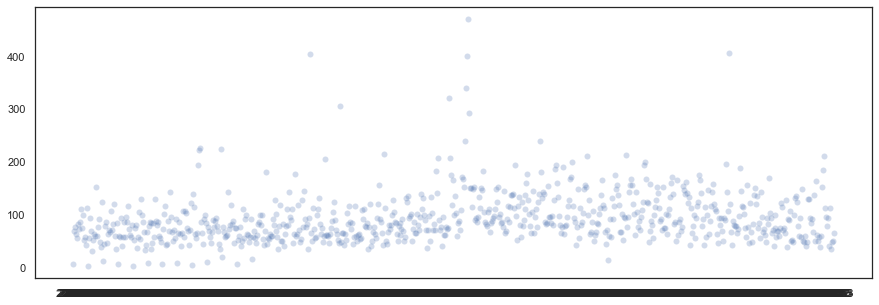

In [9]:
sns.set(style="white")
sns.cubehelix_palette(start=.5, rot=-.5)

fig, ax = plt.subplots(figsize=(15,5))
  
fig1 = plt.scatter(ufoweekly.week_id, ufoweekly.weekly_ufocount, alpha=0.25, linewidths=0)
   
#ax.fmt_xdata = DateFormatter('%Y-%w')

#fig.autofmt_xdate()

plt.show()

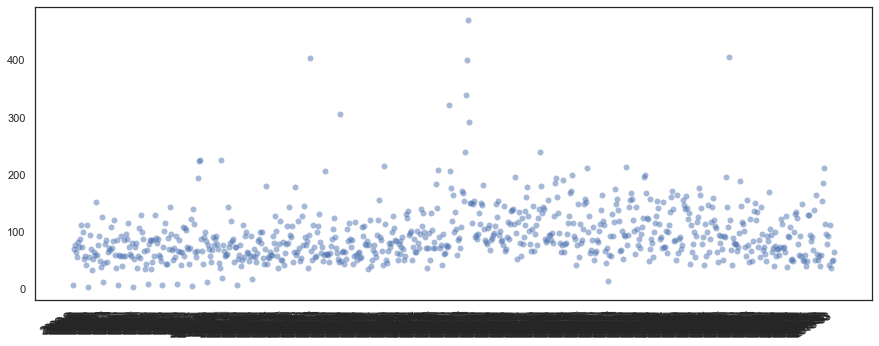

In [19]:
sns.set(style="white")
sns.cubehelix_palette(start=.5, rot=-.5)

fig, ax = plt.subplots(figsize=(15,6))
  
fig1 = plt.scatter(ufoweekly.week_id, ufoweekly.weekly_ufocount, alpha=0.5, linewidths=0)
   
ax.fmt_xdata = DateFormatter('%Y-%w')

fig.autofmt_xdate()

plt.show()

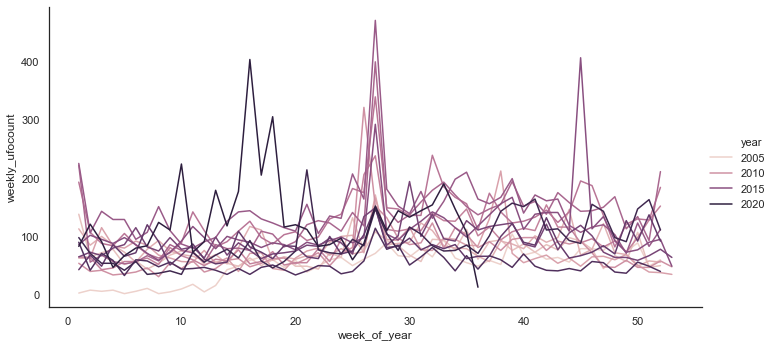

In [20]:
#sns.cubehelix_palette(start=.5, rot=-.5)
sns.relplot(x="week_of_year", y="weekly_ufocount", hue="year", kind="line", data=ufoweekly, aspect=12/6);


In [43]:
# making a copy df to plot, sort, reset_index and update
weekplotdf2 = ufoweekly.copy()
weekplotdf2 = weekplotdf2.sort_values('week_id').reset_index().drop(767)


In [44]:
# see tail
weekplotdf2.tail()

,index,week_id,weekly_ufocount,weekly_pct_entrtm,year,week_of_year
762,699,2020-4,47,10.000000,2020,4
763,524,2020-5,67,14.255319,2020,5
764,409,2020-6,80,17.021277,2020,6
765,377,2020-7,84,17.872340,2020,7
766,149,2020-8,124,26.382979,2020,8


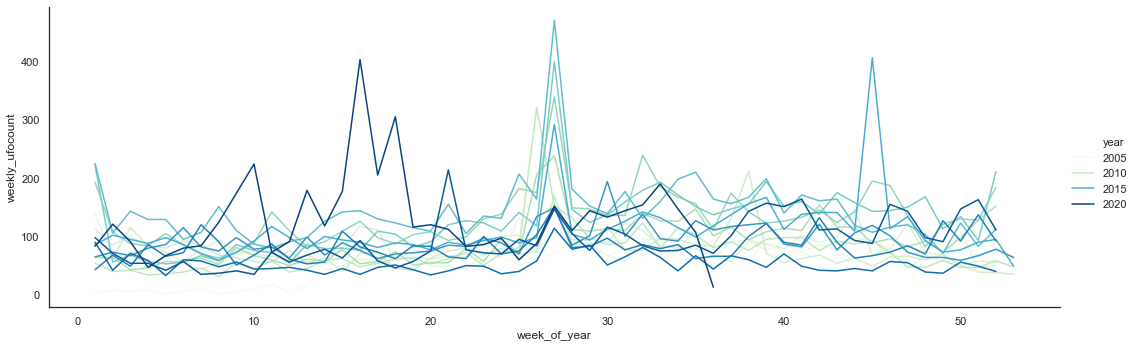

In [50]:
#palette = sns.color_palette('GnBu')

sns.relplot(x="week_of_year", y="weekly_ufocount", hue="year", kind="line", data=weekplotdf2, aspect=30/10, palette='GnBu');
